In [1]:
import pandas            as pd
import pandasql          as psql
import numpy             as np
import os
import datetime
import time
import math
import IPython

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


from   IPython.core.display           import display, HTML
from   decimal                        import Decimal

pd.set_option('display.max_columns' , 500)
pd.set_option('display.max_rows'    , 5000)
pd.set_option('display.max_colwidth', None)

print('Setting is done:')


#------------------------------------
print('Make the notebook html as wide as possible')
display(HTML("<style>.container { width:100% !important; }</style>"))
print()

script_dir = os.getcwd()
print(script_dir)

Setting is done:
Make the notebook html as wide as possible



G:\Meine Ablage\price_anomaly_detection


In [7]:
from sklearn.cluster import KMeans
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv(script_dir +'/TSLA.CSV/')

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

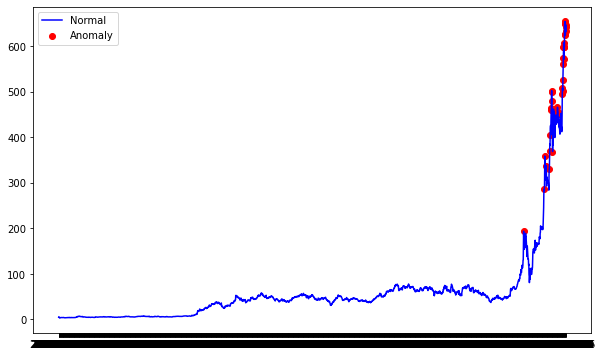

In [10]:
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
outliers_fraction = 0.015

model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
df['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['Date', 'High']] #anomaly

ax.plot(df['Date'], df['High'], color='blue', label = 'Normal')
ax.scatter(a['Date'],a['High'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [11]:
#lefin